# 参数的更新

## SGD(stochastic gradient descent)

In [11]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]    

## Momentum(动量)

In [32]:
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        # 初始化
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        # 更新
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] 
            params[key] += self.v[key]
                  

## AdaGrad(Adaptive Gradient)

In [42]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        # 初始化
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        # 更新
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / ((np.sqrt(self.h[key])) + 1e-7)

## Adam

In [43]:
class Adam:
    """Adam (http://arxiv.org/abs/1412.6980v8)"""
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            

## 优化测试

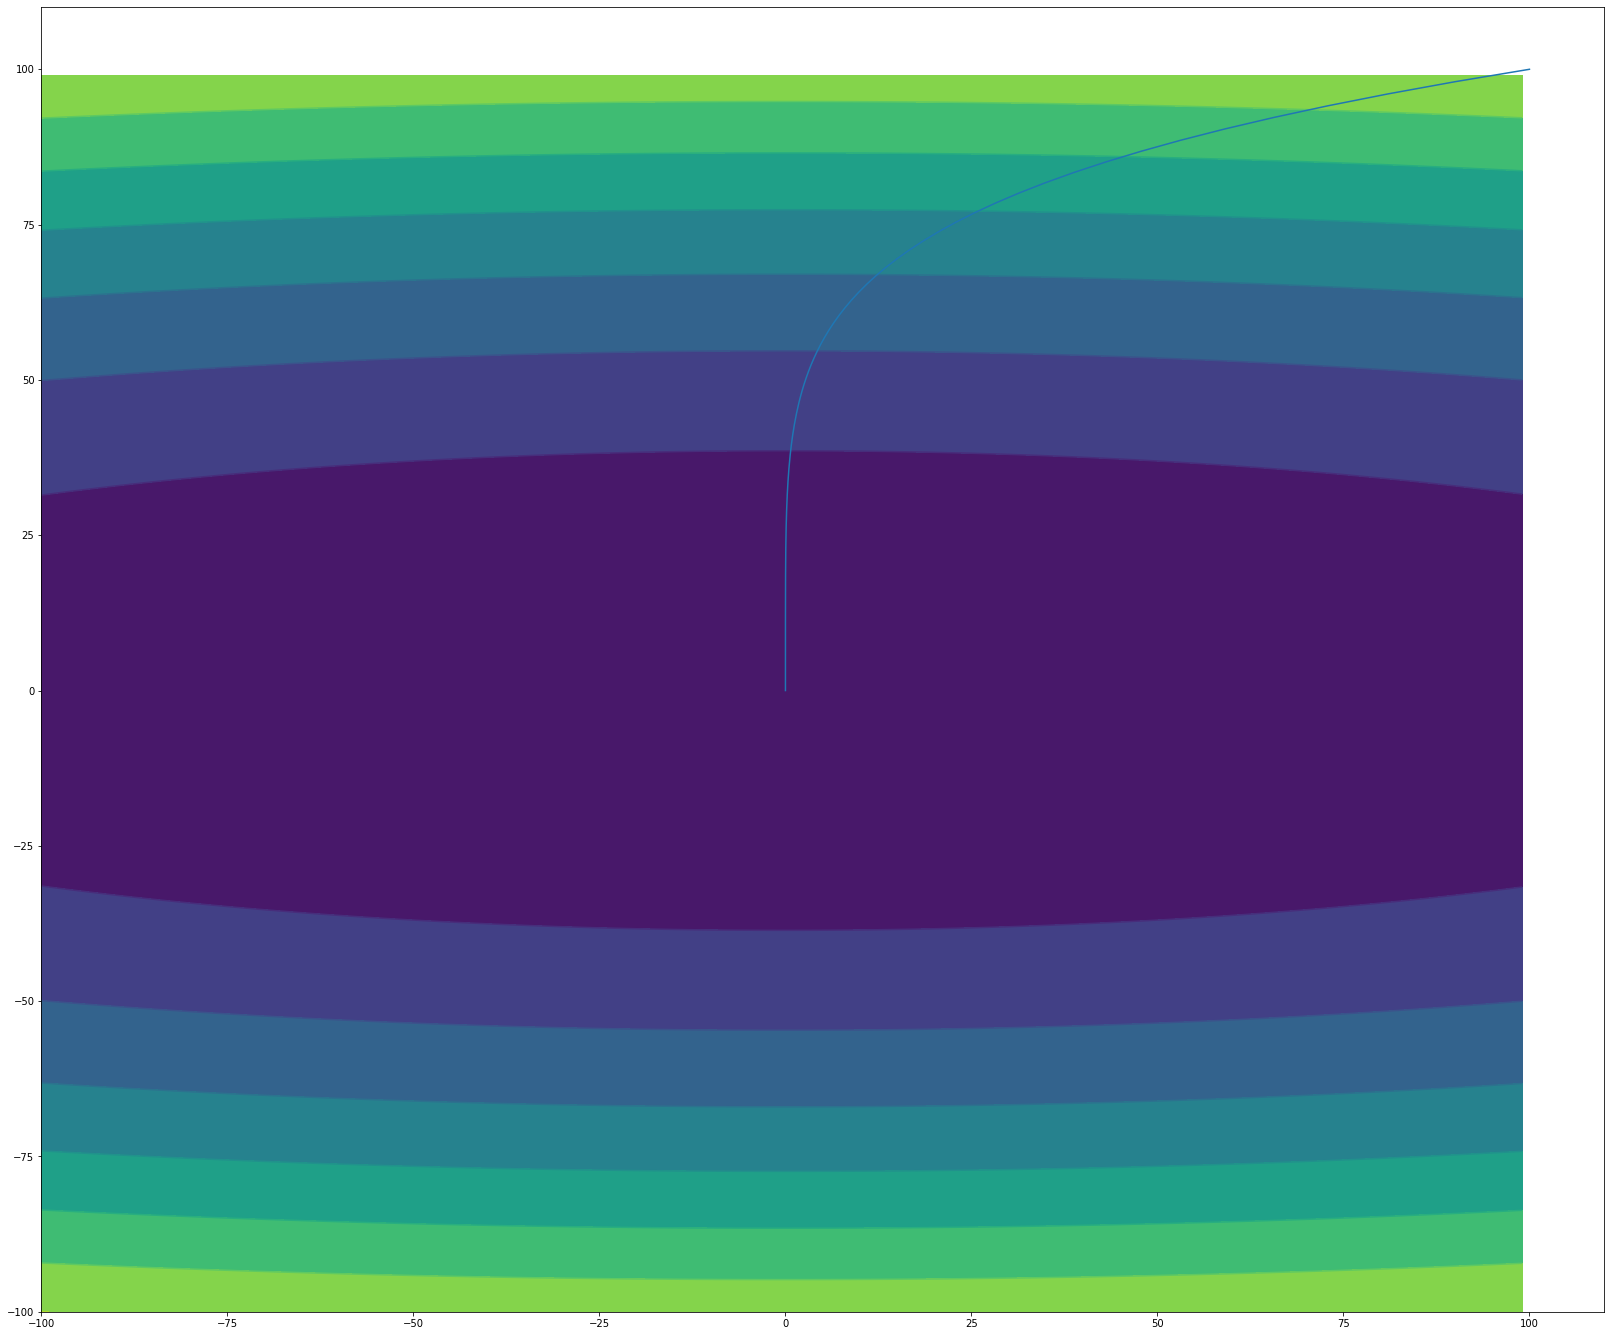

In [73]:

class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

def f(x, y):
    return x ** 2 / 20 + y ** 2 + 10

def df(x, y):
    return 10 * x, 2 * y

optimizer = SGD(lr = 0.01)

steps = 100

params['x'] = 100
params['y'] = 100
grads['x'] = 0
grads['y'] = 0

x_history = []
y_history = []

for i in range(1000):    
    x = params['x']
    y = params['y']
    x_history.append(x)
    y_history.append(y)
    
    grads['x'] , grads['y'] = df(x, y)

    optimizer.update(params, grads)

x = np.arange(-100, 100, 1)
y = np.arange(-100, 100, 1)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

plt.contourf(X, Y, Z)
plt.contour(X, Y, Z)
plt.plot(x_history, y_history)
plt.show()
#print(x_history)
#print(y_history)

## 比较

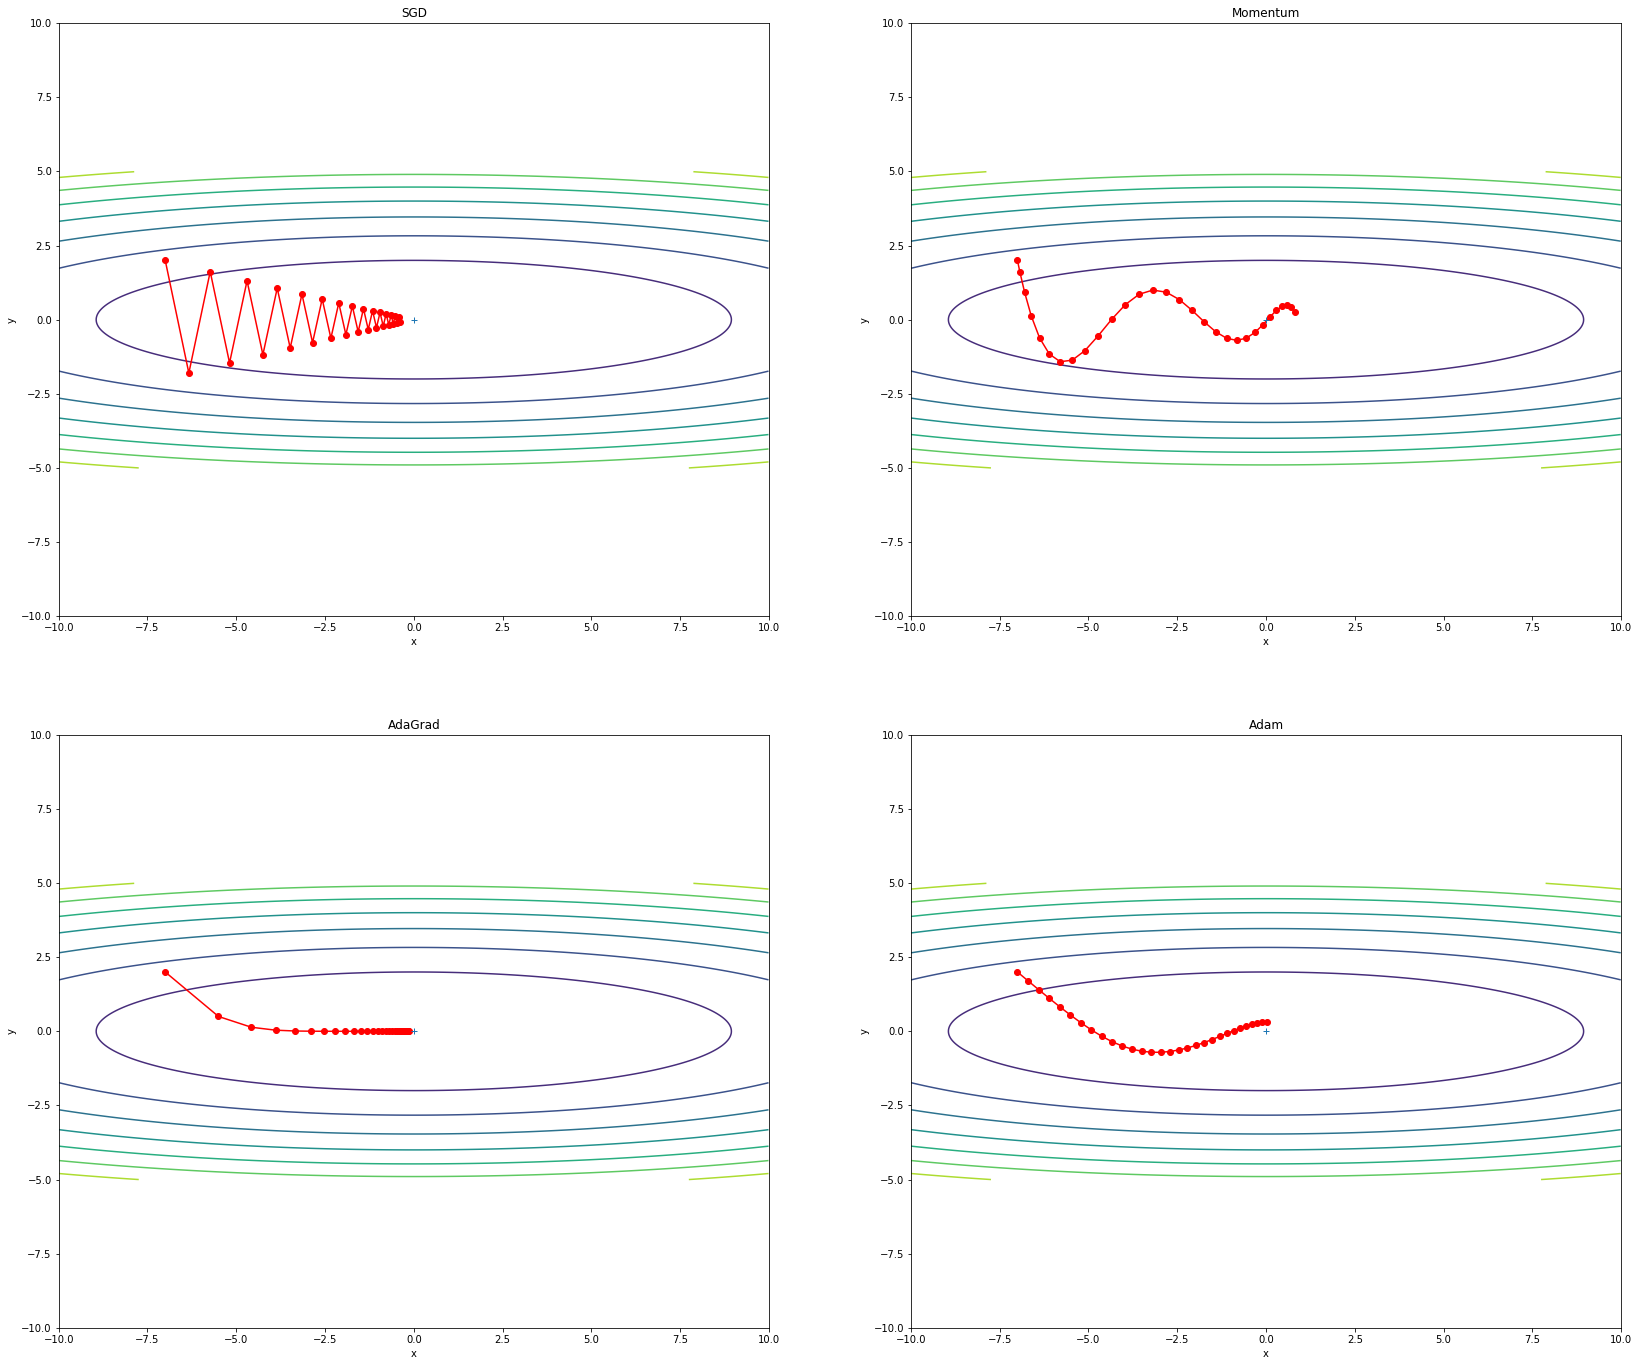

In [47]:
# coding: utf-8
import sys, os
sys.path.append('SourceCode')  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

plt.rcParams['figure.figsize'] = (28.0, 24.0)

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

## 比较Mnist

===========iteration:0===========
SGD:2.3633094894212547
Momentum:2.2185866224663098
AdaGrad:2.2239563899870536
Adam:2.189099791247515
===========iteration:100===========
SGD:1.8473917571325746
Momentum:0.3105021570300466
AdaGrad:0.13094601199973863
Adam:0.19165729509982027
===========iteration:200===========
SGD:0.943357488521783
Momentum:0.1727372110173163
AdaGrad:0.06134301402504878
Adam:0.11683632254204047
===========iteration:300===========
SGD:0.6108385828191193
Momentum:0.18315864240958427
AdaGrad:0.10525681879993339
Adam:0.14301994822906616
===========iteration:400===========
SGD:0.5243424551086672
Momentum:0.20677679787989997
AdaGrad:0.1326966494181443
Adam:0.16634676661082198
===========iteration:500===========
SGD:0.48303188702656974
Momentum:0.22300433308194245
AdaGrad:0.09874659126405848
Adam:0.12055416863434387
===========iteration:600===========
SGD:0.3384244963766002
Momentum:0.14368772043829703
AdaGrad:0.07489461933430486
Adam:0.08825661987038777
===========iteration:7

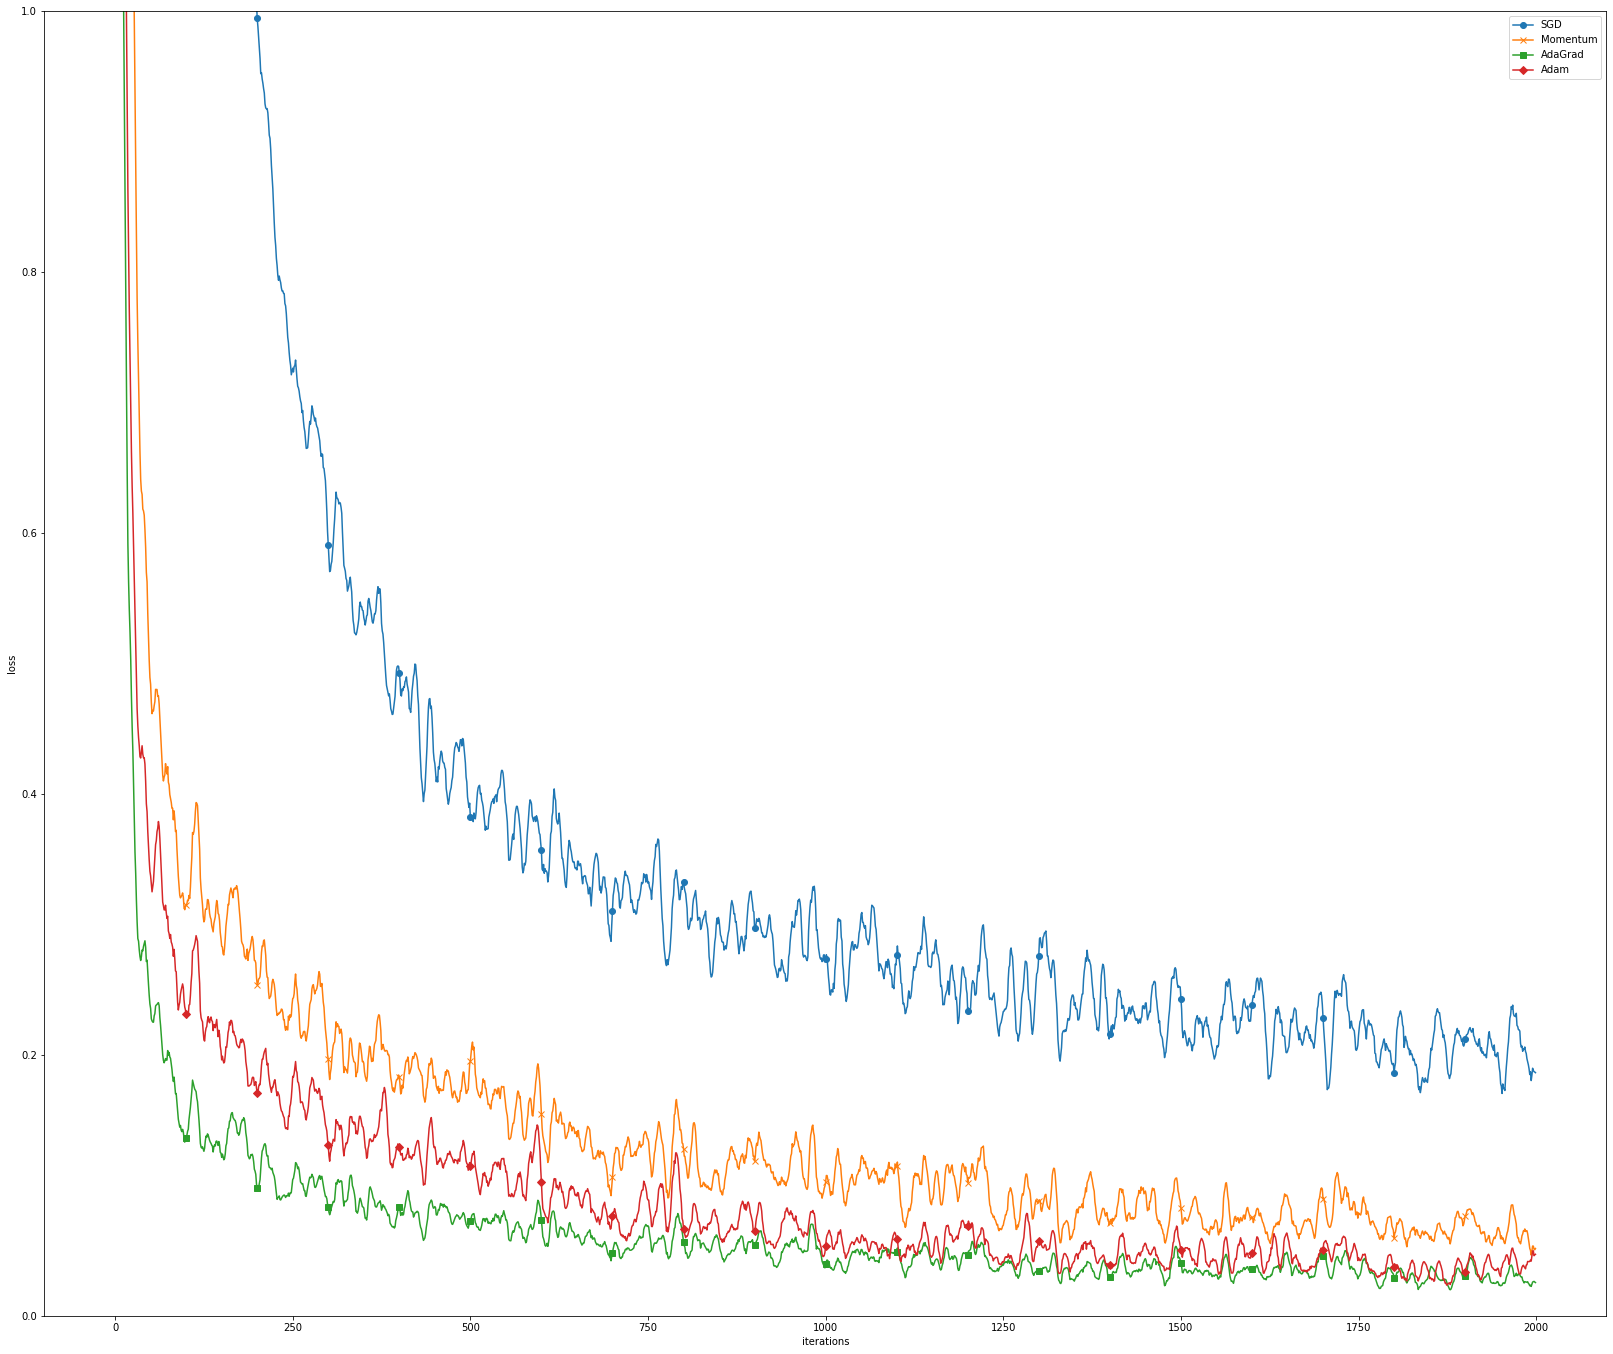

In [74]:
# coding: utf-8
import os
import sys
sys.path.append('SourceCode')  # 为了导入父目录的文件而进行的设定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 权重的初始值

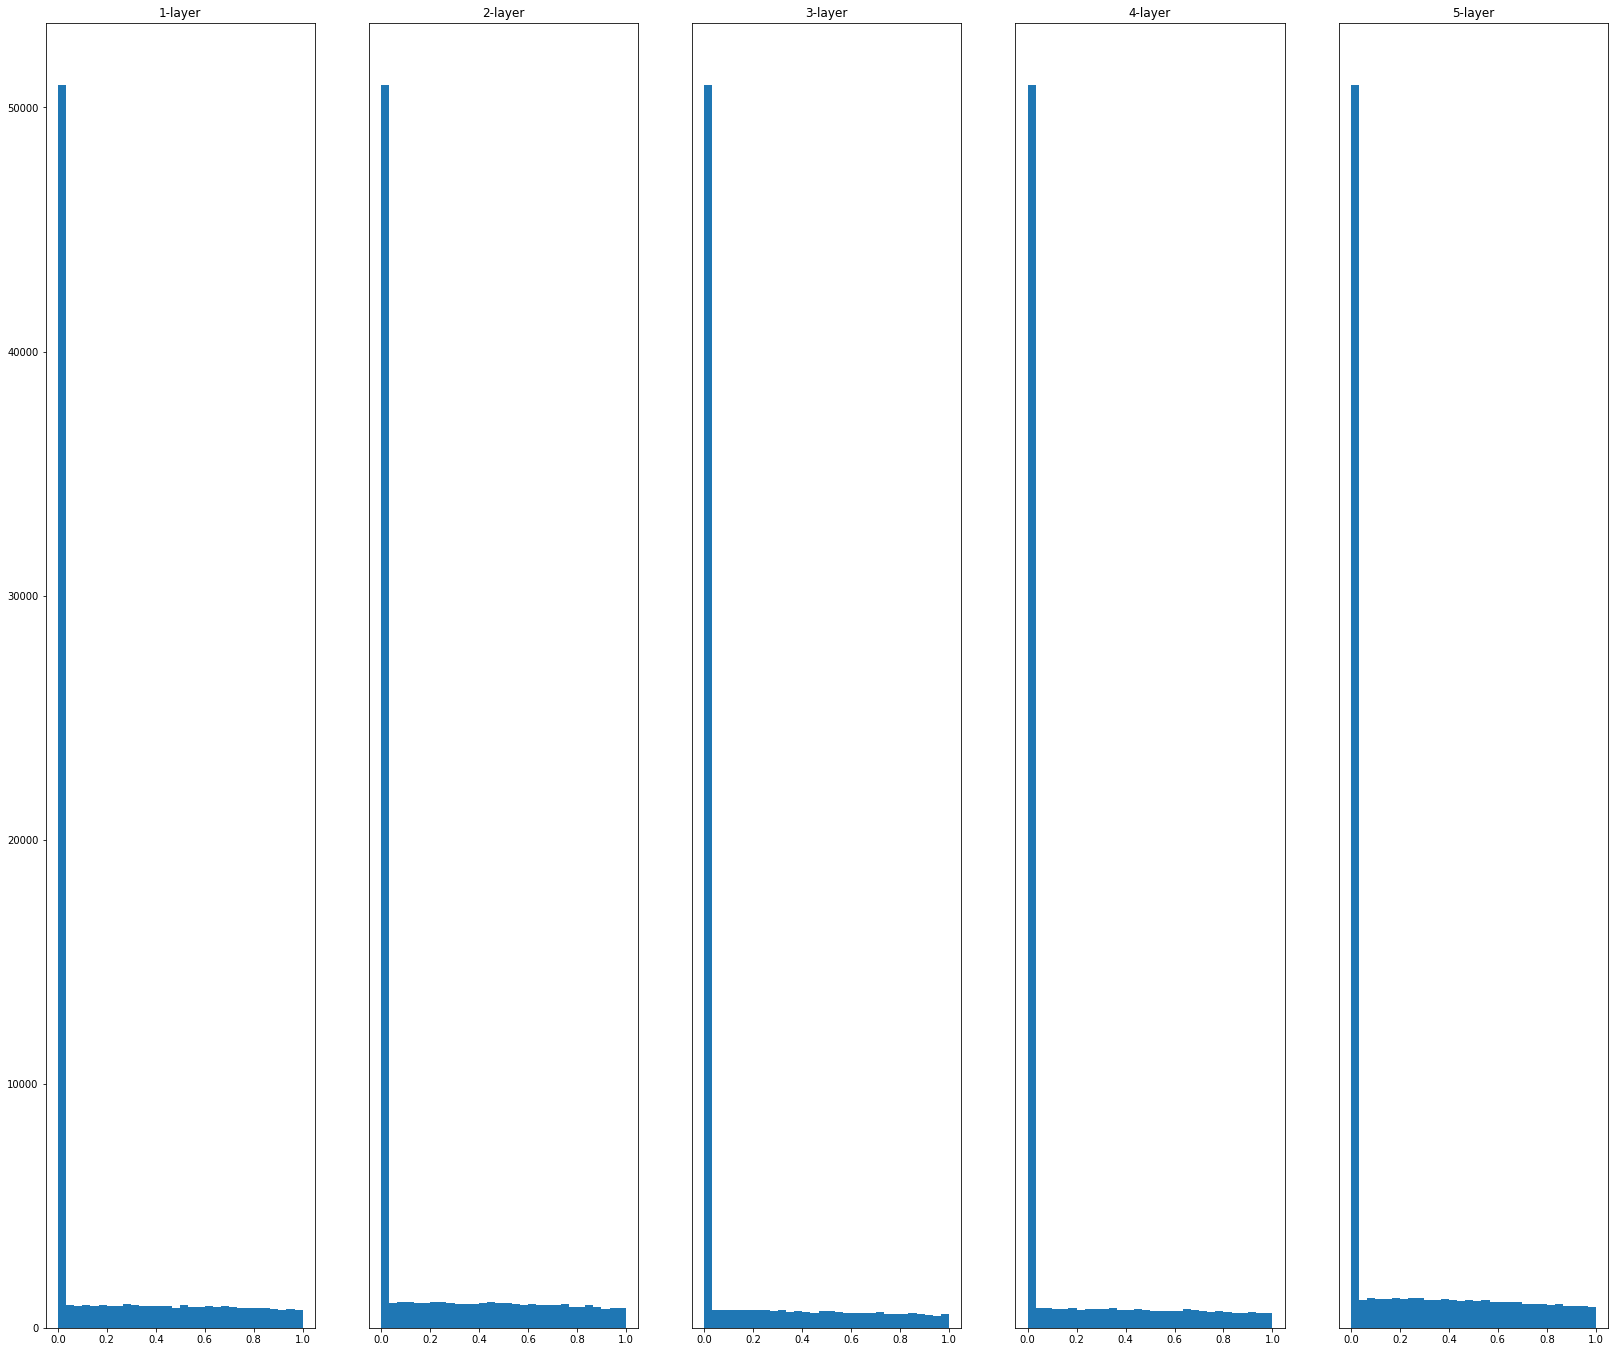

In [87]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    # = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    #plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## Mnist 初始值比较

===========iteration:0===========
std=0.01:2.3025093192472177
Xavier:2.323360754011931
He:2.3150395123685907
===========iteration:100===========
std=0.01:2.302156462850773
Xavier:2.2476647603234596
He:1.413827417329525
===========iteration:200===========
std=0.01:2.3036007328701977
Xavier:2.1442482884531717
He:0.8133487206793178
===========iteration:300===========
std=0.01:2.3013196783637104
Xavier:1.915212795528548
He:0.4783136117248392
===========iteration:400===========
std=0.01:2.302182045350487
Xavier:1.4546737238838565
He:0.38624723818694773
===========iteration:500===========
std=0.01:2.3026463386413036
Xavier:0.9939680857689969
He:0.4520473242934758
===========iteration:600===========
std=0.01:2.299604573952765
Xavier:0.7308429467144191
He:0.36604551030487265
===========iteration:700===========
std=0.01:2.30086241283632
Xavier:0.4666958194154821
He:0.17273587725300452
===========iteration:800===========
std=0.01:2.3026483749541664
Xavier:0.7188108848064307
He:0.3612326113116201

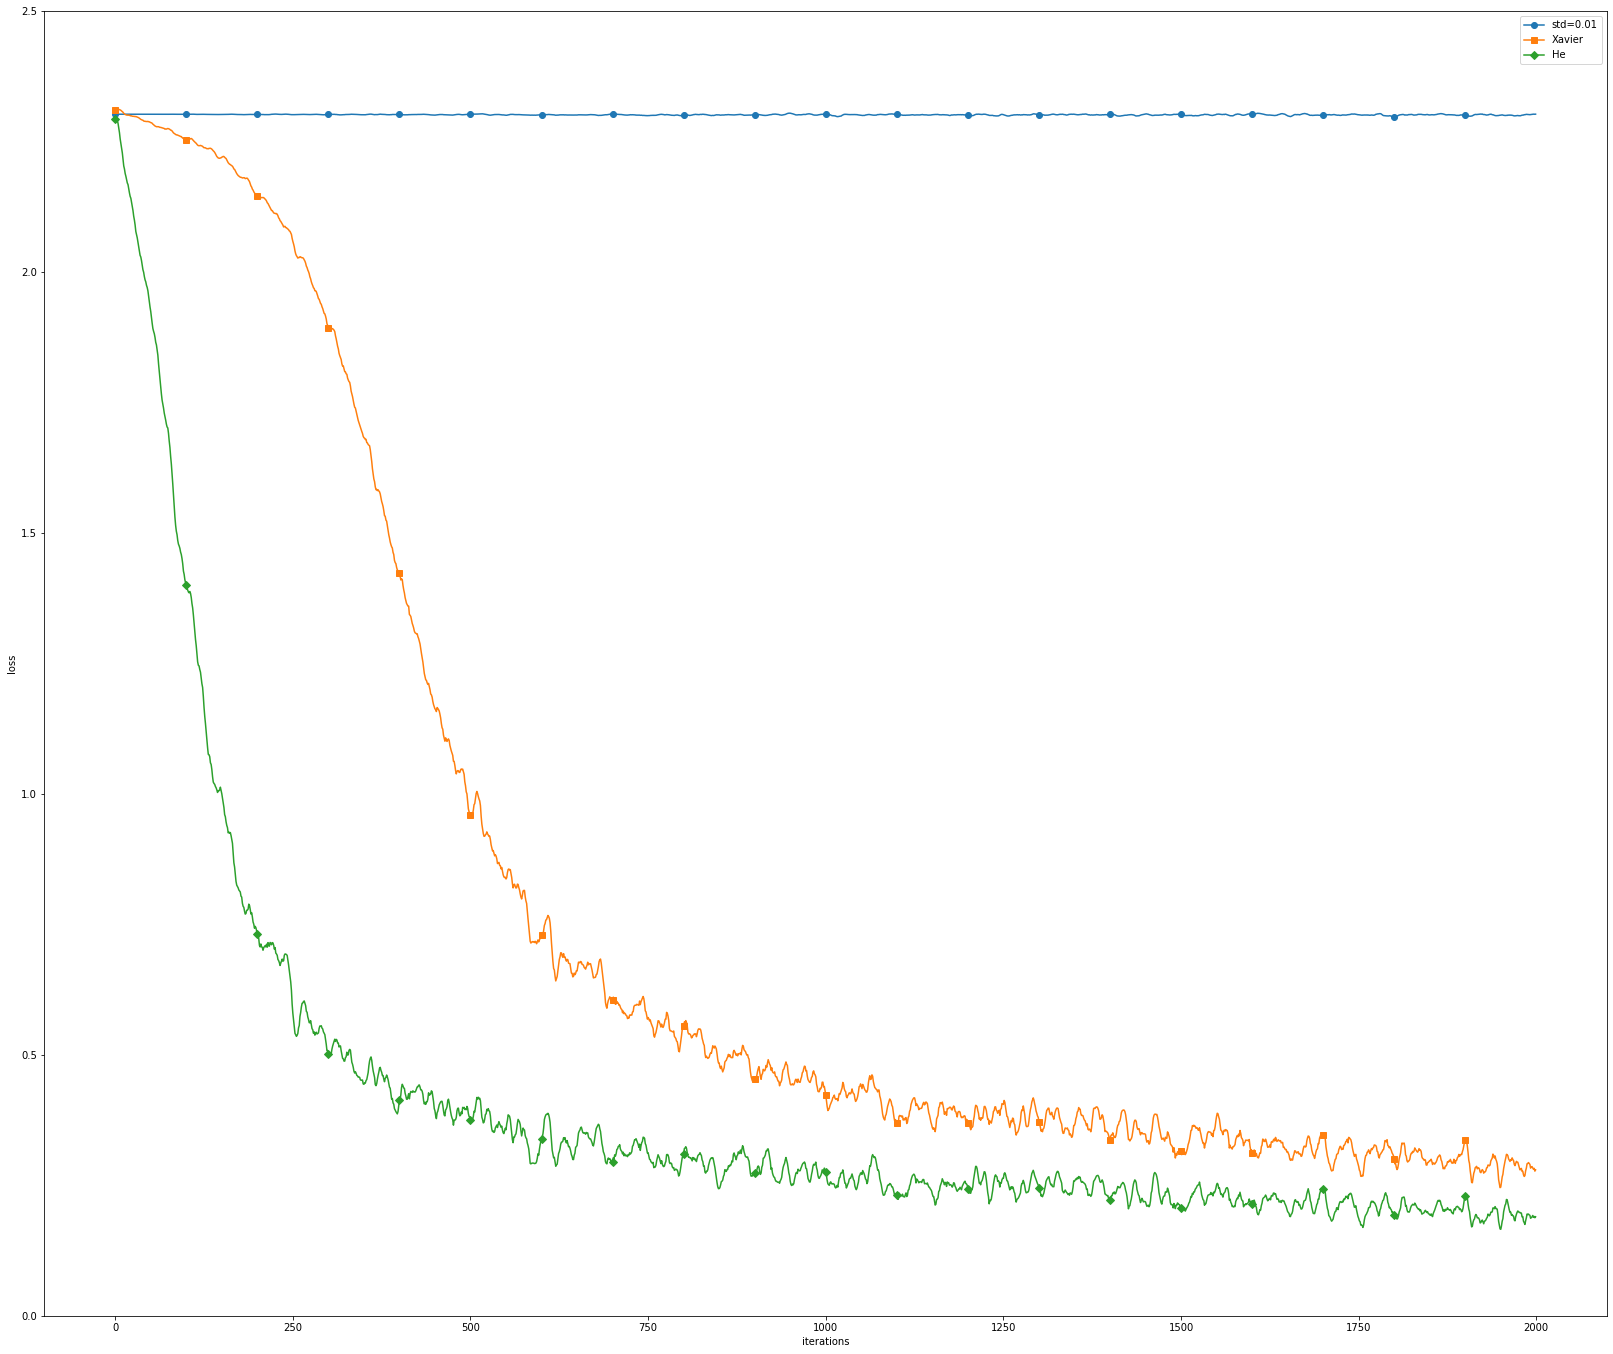

In [88]:
# coding: utf-8
import os
import sys

sys.path.append('SourceCode')  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# Batch Normalization

============== 1/16 ==============
epoch:0 | 0.105 - 0.118
epoch:1 | 0.097 - 0.107


SourceCode\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
SourceCode\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
SourceCode\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
SourceCode\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:2 | 0.097 - 0.111
epoch:3 | 0.097 - 0.141
epoch:4 | 0.097 - 0.175
epoch:5 | 0.097 - 0.202
epoch:6 | 0.097 - 0.221
epoch:7 | 0.097 - 0.244
epoch:8 | 0.097 - 0.263
epoch:9 | 0.097 - 0.279
epoch:10 | 0.097 - 0.297
epoch:11 | 0.097 - 0.311
epoch:12 | 0.097 - 0.325
epoch:13 | 0.097 - 0.349
epoch:14 | 0.097 - 0.371
epoch:15 | 0.097 - 0.378
epoch:16 | 0.097 - 0.393
epoch:17 | 0.097 - 0.411
epoch:18 | 0.097 - 0.414


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.426
============== 2/16 ==============
epoch:0 | 0.099 - 0.124
epoch:1 | 0.117 - 0.115
epoch:2 | 0.117 - 0.141
epoch:3 | 0.117 - 0.162
epoch:4 | 0.117 - 0.185
epoch:5 | 0.117 - 0.215
epoch:6 | 0.117 - 0.239
epoch:7 | 0.117 - 0.265
epoch:8 | 0.117 - 0.287
epoch:9 | 0.117 - 0.312
epoch:10 | 0.117 - 0.333
epoch:11 | 0.117 - 0.361
epoch:12 | 0.117 - 0.374
epoch:13 | 0.117 - 0.394
epoch:14 | 0.117 - 0.412
epoch:15 | 0.117 - 0.432
epoch:16 | 0.117 - 0.448
epoch:17 | 0.117 - 0.47
epoch:18 | 0.117 - 0.488


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.506
============== 3/16 ==============
epoch:0 | 0.099 - 0.089
epoch:1 | 0.347 - 0.107
epoch:2 | 0.445 - 0.155
epoch:3 | 0.537 - 0.204
epoch:4 | 0.631 - 0.238
epoch:5 | 0.676 - 0.275
epoch:6 | 0.72 - 0.315
epoch:7 | 0.703 - 0.333
epoch:8 | 0.776 - 0.364
epoch:9 | 0.799 - 0.389
epoch:10 | 0.833 - 0.414
epoch:11 | 0.864 - 0.437
epoch:12 | 0.87 - 0.461
epoch:13 | 0.898 - 0.492
epoch:14 | 0.911 - 0.517
epoch:15 | 0.91 - 0.535
epoch:16 | 0.923 - 0.559
epoch:17 | 0.939 - 0.566


No handles with labels found to put in legend.


epoch:18 | 0.95 - 0.59
epoch:19 | 0.947 - 0.619
============== 4/16 ==============
epoch:0 | 0.097 - 0.13
epoch:1 | 0.267 - 0.17
epoch:2 | 0.412 - 0.22
epoch:3 | 0.491 - 0.261
epoch:4 | 0.564 - 0.319
epoch:5 | 0.619 - 0.38
epoch:6 | 0.654 - 0.428
epoch:7 | 0.688 - 0.484
epoch:8 | 0.728 - 0.519
epoch:9 | 0.744 - 0.548
epoch:10 | 0.761 - 0.598
epoch:11 | 0.773 - 0.615
epoch:12 | 0.79 - 0.639
epoch:13 | 0.802 - 0.661
epoch:14 | 0.815 - 0.687
epoch:15 | 0.823 - 0.709
epoch:16 | 0.833 - 0.725
epoch:17 | 0.844 - 0.74
epoch:18 | 0.859 - 0.752


No handles with labels found to put in legend.


epoch:19 | 0.857 - 0.766
============== 5/16 ==============
epoch:0 | 0.091 - 0.122
epoch:1 | 0.101 - 0.17
epoch:2 | 0.114 - 0.31
epoch:3 | 0.12 - 0.399
epoch:4 | 0.13 - 0.484
epoch:5 | 0.14 - 0.554
epoch:6 | 0.145 - 0.603
epoch:7 | 0.155 - 0.659
epoch:8 | 0.158 - 0.7
epoch:9 | 0.166 - 0.731
epoch:10 | 0.186 - 0.761
epoch:11 | 0.207 - 0.783
epoch:12 | 0.218 - 0.8
epoch:13 | 0.228 - 0.821
epoch:14 | 0.245 - 0.832
epoch:15 | 0.25 - 0.839
epoch:16 | 0.258 - 0.854
epoch:17 | 0.276 - 0.862


No handles with labels found to put in legend.


epoch:18 | 0.297 - 0.88
epoch:19 | 0.312 - 0.886
============== 6/16 ==============
epoch:0 | 0.097 - 0.089
epoch:1 | 0.116 - 0.2
epoch:2 | 0.125 - 0.46
epoch:3 | 0.175 - 0.597
epoch:4 | 0.142 - 0.688
epoch:5 | 0.172 - 0.734
epoch:6 | 0.169 - 0.762
epoch:7 | 0.129 - 0.808
epoch:8 | 0.145 - 0.815
epoch:9 | 0.145 - 0.839
epoch:10 | 0.158 - 0.86
epoch:11 | 0.117 - 0.884
epoch:12 | 0.117 - 0.891
epoch:13 | 0.148 - 0.904
epoch:14 | 0.163 - 0.915
epoch:15 | 0.12 - 0.918
epoch:16 | 0.117 - 0.928
epoch:17 | 0.117 - 0.939
epoch:18 | 0.117 - 0.947


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.954
============== 7/16 ==============
epoch:0 | 0.116 - 0.093
epoch:1 | 0.105 - 0.291
epoch:2 | 0.117 - 0.531
epoch:3 | 0.116 - 0.61
epoch:4 | 0.116 - 0.709
epoch:5 | 0.116 - 0.796
epoch:6 | 0.116 - 0.845
epoch:7 | 0.116 - 0.888
epoch:8 | 0.117 - 0.913
epoch:9 | 0.117 - 0.93
epoch:10 | 0.117 - 0.945
epoch:11 | 0.117 - 0.953
epoch:12 | 0.117 - 0.962
epoch:13 | 0.117 - 0.969
epoch:14 | 0.117 - 0.975
epoch:15 | 0.117 - 0.978
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.988


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.991
epoch:19 | 0.117 - 0.993
============== 8/16 ==============
epoch:0 | 0.105 - 0.136
epoch:1 | 0.105 - 0.32
epoch:2 | 0.105 - 0.729
epoch:3 | 0.116 - 0.819
epoch:4 | 0.116 - 0.869
epoch:5 | 0.116 - 0.897
epoch:6 | 0.116 - 0.92
epoch:7 | 0.116 - 0.941
epoch:8 | 0.116 - 0.953
epoch:9 | 0.116 - 0.966
epoch:10 | 0.116 - 0.974
epoch:11 | 0.116 - 0.981
epoch:12 | 0.116 - 0.987
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.093 - 0.073
epoch:1 | 0.117 - 0.496
epoch:2 | 0.117 - 0.707
epoch:3 | 0.117 - 0.777
epoch:4 | 0.117 - 0.862
epoch:5 | 0.117 - 0.939
epoch:6 | 0.116 - 0.965
epoch:7 | 0.117 - 0.976
epoch:8 | 0.117 - 0.983
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.182
epoch:1 | 0.116 - 0.608
epoch:2 | 0.116 - 0.83
epoch:3 | 0.116 - 0.896
epoch:4 | 0.116 - 0.889
epoch:5 | 0.116 - 0.957
epoch:6 | 0.116 - 0.949
epoch:7 | 0.116 - 0.976
epoch:8 | 0.116 - 0.942
epoch:9 | 0.116 - 0.987
epoch:10 | 0.116 - 0.982
epoch:11 | 0.116 - 0.995
epoch:12 | 0.116 - 0.996
epoch:13 | 0.116 - 0.987
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.097 - 0.142
epoch:1 | 0.117 - 0.635
epoch:2 | 0.117 - 0.751
epoch:3 | 0.117 - 0.762
epoch:4 | 0.117 - 0.758
epoch:5 | 0.117 - 0.783
epoch:6 | 0.117 - 0.796
epoch:7 | 0.117 - 0.8
epoch:8 | 0.117 - 0.667
epoch:9 | 0.117 - 0.798
epoch:10 | 0.117 - 0.789
epoch:11 | 0.117 - 0.86
epoch:12 | 0.117 - 0.89
epoch:13 | 0.117 - 0.897
epoch:14 | 0.117 - 0.898
epoch:15 | 0.117 - 0.885
epoch:16 | 0.117 - 0.898
epoch:17 | 0.117 - 0.899


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.892
epoch:19 | 0.117 - 0.895
============== 12/16 ==============
epoch:0 | 0.105 - 0.093
epoch:1 | 0.117 - 0.487
epoch:2 | 0.117 - 0.607
epoch:3 | 0.117 - 0.647
epoch:4 | 0.117 - 0.658
epoch:5 | 0.117 - 0.677
epoch:6 | 0.117 - 0.669
epoch:7 | 0.117 - 0.687
epoch:8 | 0.117 - 0.696
epoch:9 | 0.117 - 0.699
epoch:10 | 0.117 - 0.688
epoch:11 | 0.117 - 0.706
epoch:12 | 0.117 - 0.711
epoch:13 | 0.117 - 0.713
epoch:14 | 0.117 - 0.711
epoch:15 | 0.117 - 0.71
epoch:16 | 0.117 - 0.713
epoch:17 | 0.117 - 0.713
epoch:18 | 0.117 - 0.716


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.813
============== 13/16 ==============
epoch:0 | 0.116 - 0.228
epoch:1 | 0.116 - 0.564
epoch:2 | 0.117 - 0.548
epoch:3 | 0.116 - 0.577
epoch:4 | 0.116 - 0.594
epoch:5 | 0.116 - 0.635
epoch:6 | 0.116 - 0.689
epoch:7 | 0.116 - 0.662
epoch:8 | 0.116 - 0.675
epoch:9 | 0.116 - 0.673
epoch:10 | 0.116 - 0.693
epoch:11 | 0.116 - 0.686
epoch:12 | 0.116 - 0.682
epoch:13 | 0.116 - 0.678
epoch:14 | 0.116 - 0.69
epoch:15 | 0.116 - 0.699
epoch:16 | 0.117 - 0.704
epoch:17 | 0.117 - 0.704


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.708
epoch:19 | 0.117 - 0.705
============== 14/16 ==============
epoch:0 | 0.105 - 0.105
epoch:1 | 0.117 - 0.396
epoch:2 | 0.117 - 0.486
epoch:3 | 0.117 - 0.409
epoch:4 | 0.117 - 0.506
epoch:5 | 0.116 - 0.494
epoch:6 | 0.116 - 0.509
epoch:7 | 0.116 - 0.519
epoch:8 | 0.116 - 0.511
epoch:9 | 0.116 - 0.512
epoch:10 | 0.116 - 0.528
epoch:11 | 0.116 - 0.517
epoch:12 | 0.116 - 0.53
epoch:13 | 0.116 - 0.488
epoch:14 | 0.116 - 0.523
epoch:15 | 0.116 - 0.581
epoch:16 | 0.116 - 0.528
epoch:17 | 0.116 - 0.616
epoch:18 | 0.116 - 0.623


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.625
============== 15/16 ==============
epoch:0 | 0.092 - 0.107
epoch:1 | 0.116 - 0.386
epoch:2 | 0.116 - 0.402
epoch:3 | 0.116 - 0.549
epoch:4 | 0.116 - 0.591
epoch:5 | 0.116 - 0.602
epoch:6 | 0.116 - 0.556
epoch:7 | 0.116 - 0.604
epoch:8 | 0.116 - 0.609
epoch:9 | 0.116 - 0.606
epoch:10 | 0.116 - 0.613
epoch:11 | 0.116 - 0.615
epoch:12 | 0.116 - 0.612
epoch:13 | 0.116 - 0.624
epoch:14 | 0.116 - 0.674
epoch:15 | 0.116 - 0.687
epoch:16 | 0.116 - 0.694
epoch:17 | 0.116 - 0.693


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.706
epoch:19 | 0.116 - 0.621
============== 16/16 ==============
epoch:0 | 0.097 - 0.1
epoch:1 | 0.094 - 0.15
epoch:2 | 0.116 - 0.299
epoch:3 | 0.117 - 0.379
epoch:4 | 0.117 - 0.406
epoch:5 | 0.116 - 0.414
epoch:6 | 0.116 - 0.413
epoch:7 | 0.116 - 0.47
epoch:8 | 0.116 - 0.465
epoch:9 | 0.116 - 0.515
epoch:10 | 0.116 - 0.512
epoch:11 | 0.116 - 0.522
epoch:12 | 0.116 - 0.516
epoch:13 | 0.116 - 0.518
epoch:14 | 0.116 - 0.522
epoch:15 | 0.116 - 0.502
epoch:16 | 0.116 - 0.517
epoch:17 | 0.116 - 0.519
epoch:18 | 0.116 - 0.523
epoch:19 | 0.116 - 0.52


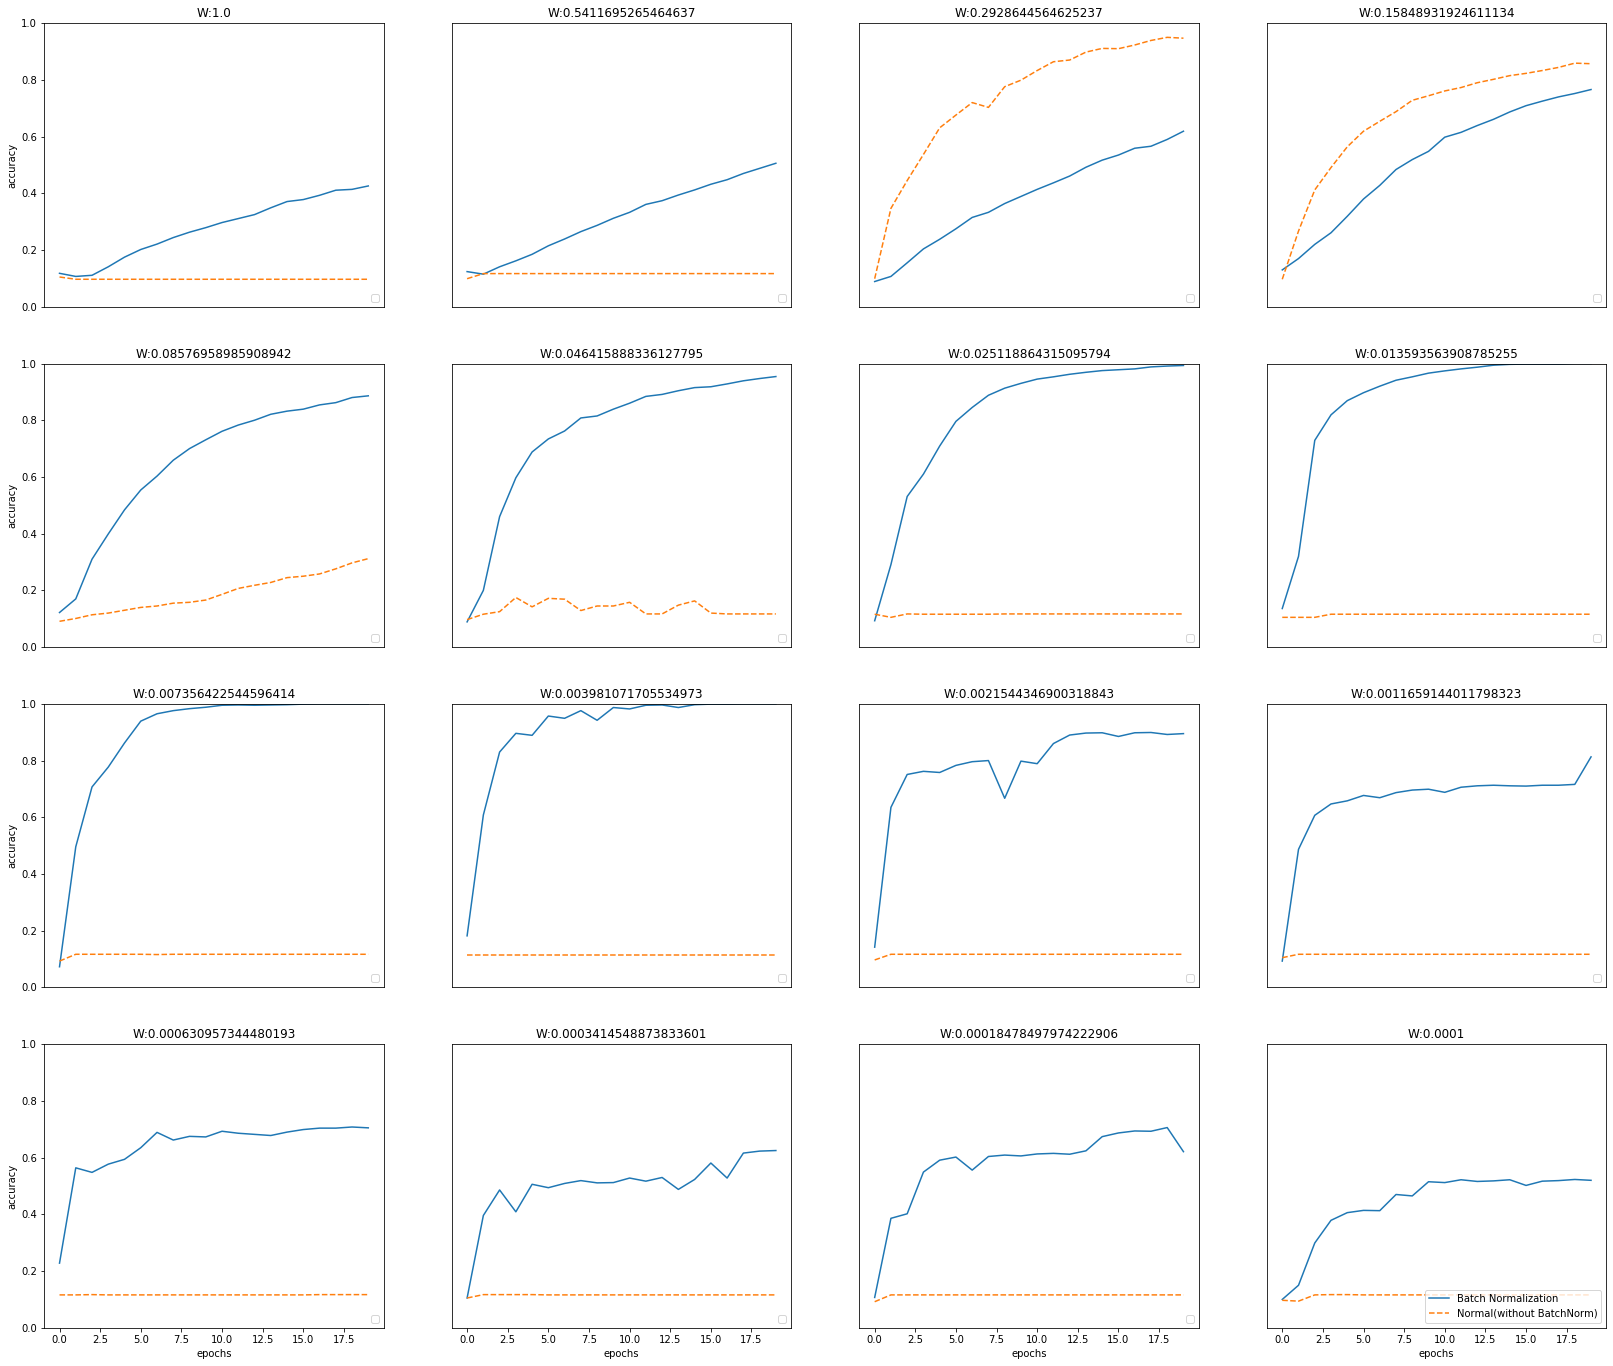

In [89]:
# coding: utf-8
import sys, os
sys.path.append('SourceCode')  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 减少学习数据
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.绘制图形==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

# 正则化

epoch:0, train acc:0.06666666666666667, test acc:0.0718
epoch:1, train acc:0.10666666666666667, test acc:0.0823
epoch:2, train acc:0.18666666666666668, test acc:0.1313
epoch:3, train acc:0.22333333333333333, test acc:0.163
epoch:4, train acc:0.23666666666666666, test acc:0.1909
epoch:5, train acc:0.25666666666666665, test acc:0.2062
epoch:6, train acc:0.2733333333333333, test acc:0.214
epoch:7, train acc:0.26666666666666666, test acc:0.2151
epoch:8, train acc:0.29, test acc:0.2244
epoch:9, train acc:0.31, test acc:0.2356
epoch:10, train acc:0.31666666666666665, test acc:0.2437
epoch:11, train acc:0.32666666666666666, test acc:0.2543
epoch:12, train acc:0.33, test acc:0.2568
epoch:13, train acc:0.3333333333333333, test acc:0.2636
epoch:14, train acc:0.3333333333333333, test acc:0.2669
epoch:15, train acc:0.36333333333333334, test acc:0.2819
epoch:16, train acc:0.36333333333333334, test acc:0.2799
epoch:17, train acc:0.39666666666666667, test acc:0.2884
epoch:18, train acc:0.406666666666

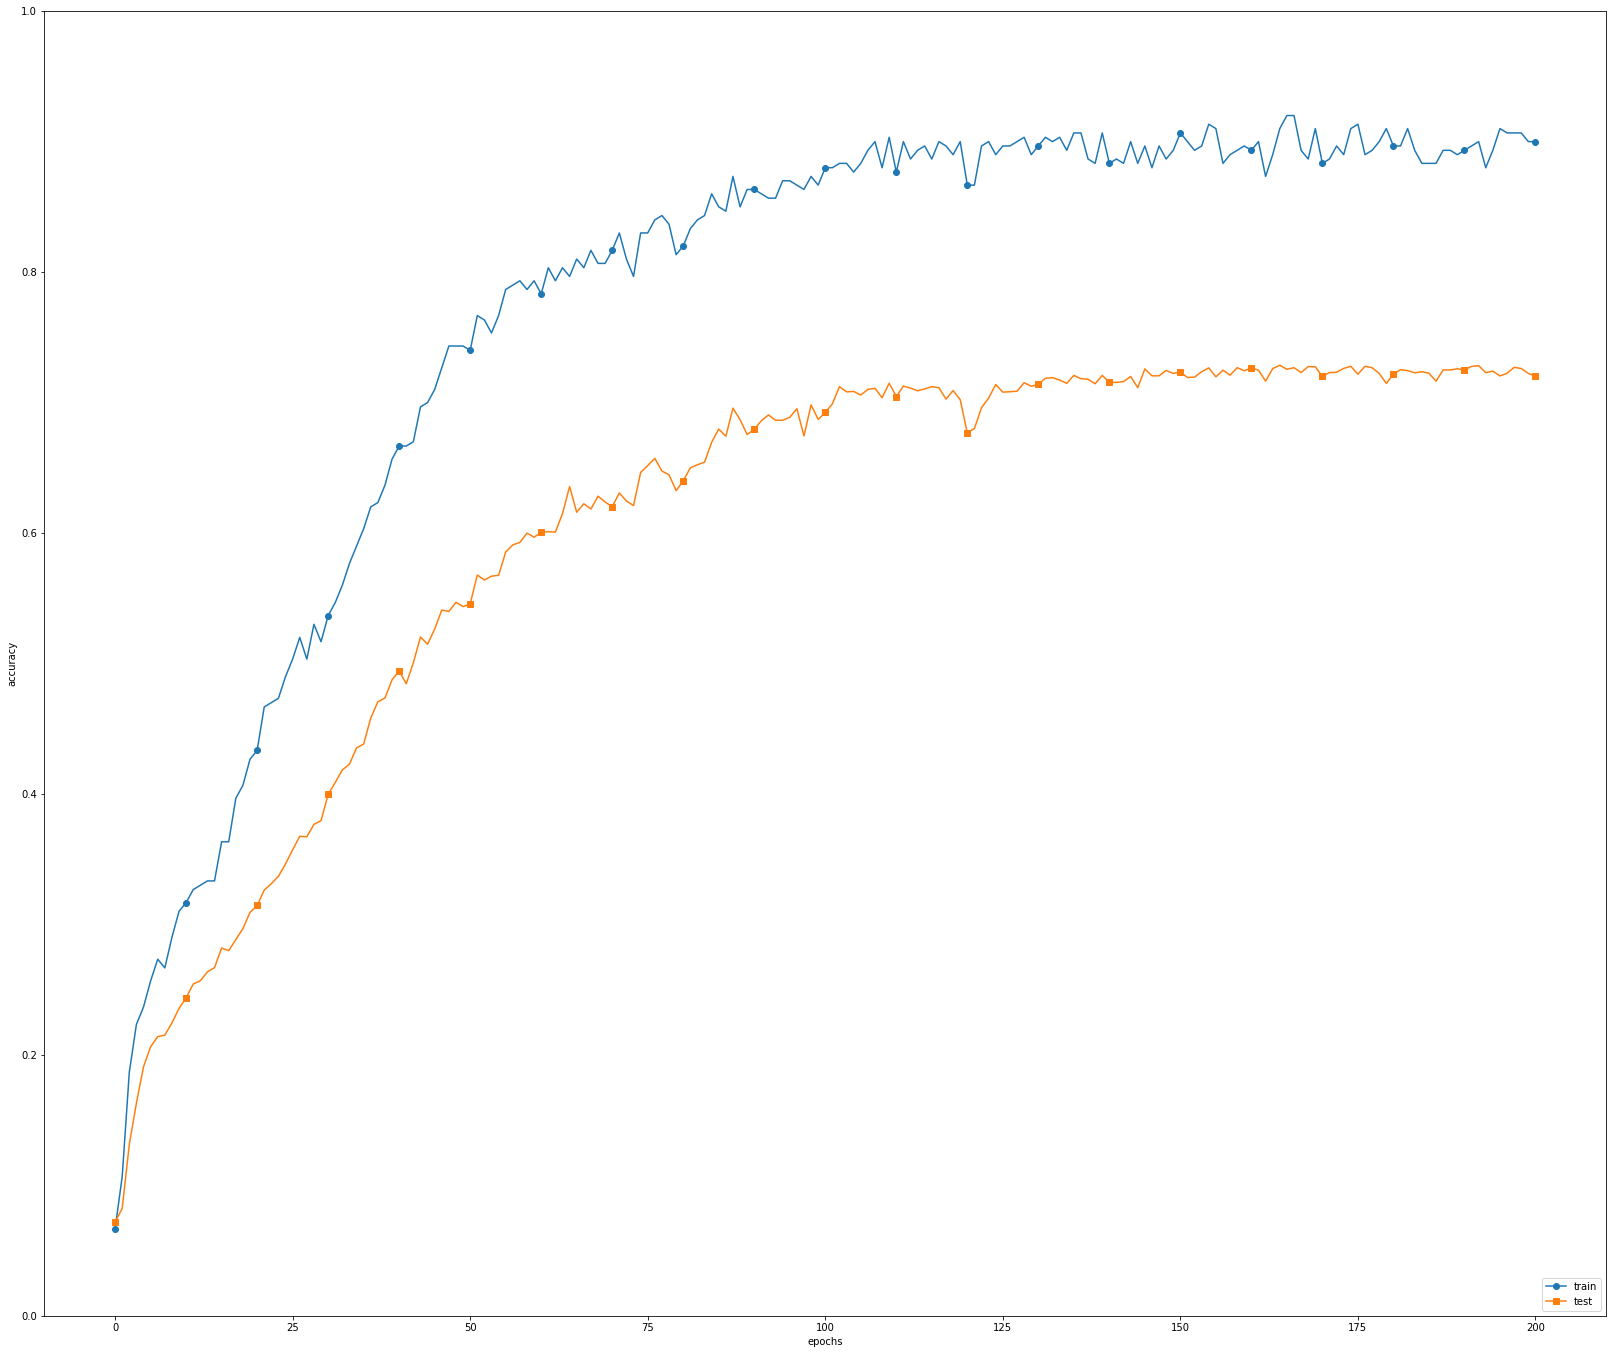

In [90]:
# coding: utf-8
import os
import sys

sys.path.append('SourceCode')  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（权值衰减）的设定 =======================
#weight_decay_lambda = 0 # 不使用权值衰减的情况
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# DropOut

train loss:2.3255386411673076
=== epoch:1, train acc:0.06666666666666667, test acc:0.1058 ===
train loss:2.312397300549328
train loss:2.3209391395077628
train loss:2.303345112182462
=== epoch:2, train acc:0.07, test acc:0.1078 ===
train loss:2.305939603589764
train loss:2.3010795365692553
train loss:2.307105808936777
=== epoch:3, train acc:0.07666666666666666, test acc:0.1074 ===
train loss:2.3070741731511237
train loss:2.3059017037575114
train loss:2.304605571235441
=== epoch:4, train acc:0.08, test acc:0.1072 ===
train loss:2.298948160269491
train loss:2.305660552496093
train loss:2.30972229997165
=== epoch:5, train acc:0.08666666666666667, test acc:0.1055 ===
train loss:2.3035219276524277
train loss:2.3074465271016886
train loss:2.305511738329419
=== epoch:6, train acc:0.09, test acc:0.1042 ===
train loss:2.299477038343426
train loss:2.308675696905468
train loss:2.296790336974082
=== epoch:7, train acc:0.08666666666666667, test acc:0.1057 ===
train loss:2.3093638167847086
train loss

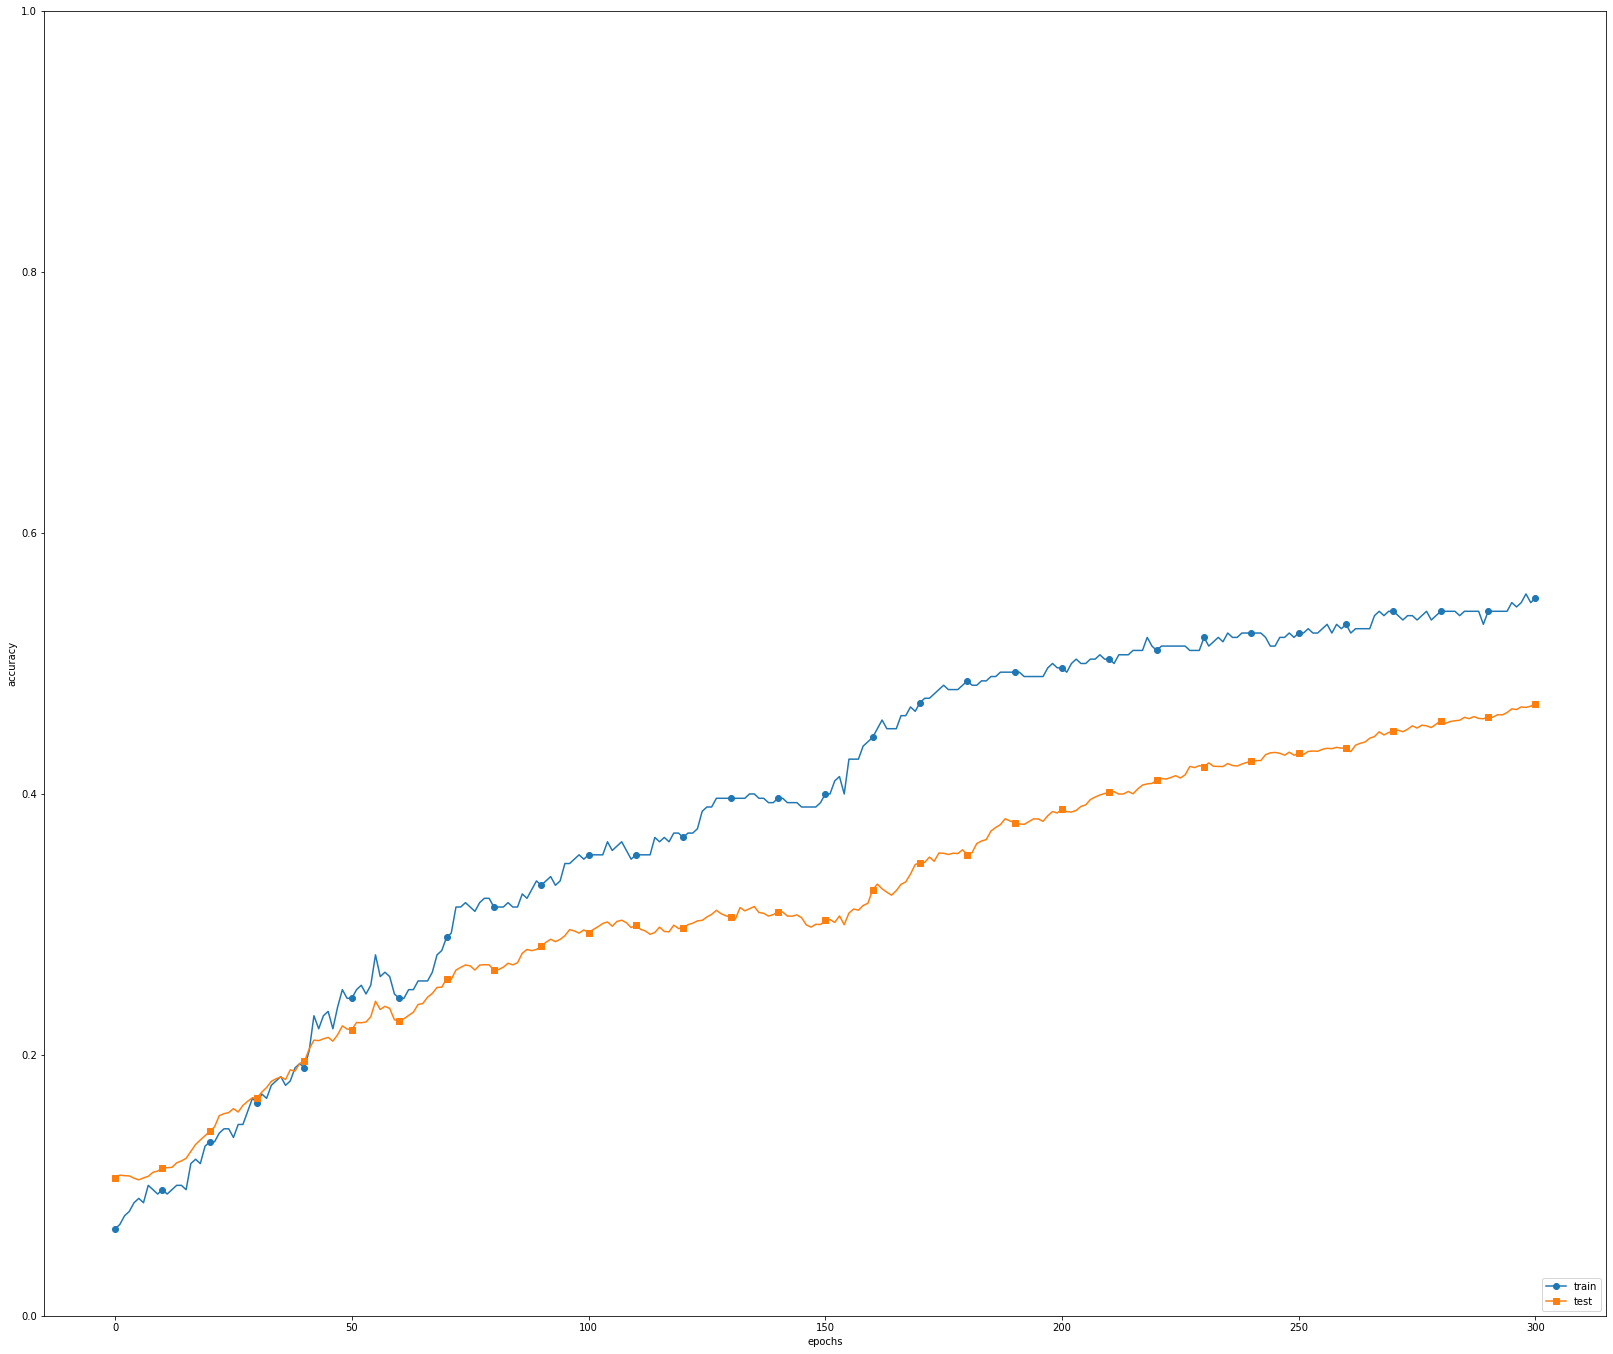

In [91]:
# coding: utf-8
import os
import sys
sys.path.append('SourceCode')  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# 设定是否使用Dropuout，以及比例 ========================
use_dropout = True  # 不使用Dropout的情况下为False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 超参数的优化

In [ ]:
# coding: utf-8
import sys, os
sys.path.append('SourceCode')  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了实现高速化，减少训练数据
x_train = x_train[:500]
t_train = t_train[:500]

# 分割验证数据
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 超参数的随机搜索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 指定搜索的超参数的范围===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 绘制图形========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()


val acc:0.4 | lr:0.003710212442970001, weight decay:9.135222645593876e-07
val acc:0.11 | lr:1.1983596565582522e-05, weight decay:5.983806601911534e-06
val acc:0.15 | lr:0.0001247915272532219, weight decay:1.1197184325529626e-06
val acc:0.15 | lr:0.0002242728626507218, weight decay:7.034190310412686e-05
val acc:0.09 | lr:0.00026583362610675085, weight decay:3.807638475471991e-06
val acc:0.22 | lr:0.0008300847463584444, weight decay:6.060398540222369e-06
val acc:0.14 | lr:0.0010886926238039716, weight decay:2.7521865470370903e-07
val acc:0.05 | lr:6.822296192795222e-05, weight decay:7.244925330326399e-06
val acc:0.18 | lr:1.726800161360141e-06, weight decay:2.0241819668998757e-08
val acc:0.11 | lr:1.3342183481410608e-06, weight decay:1.3752968666394102e-07
val acc:0.07 | lr:2.976272505012235e-05, weight decay:3.516460713459373e-05
val acc:0.26 | lr:0.0024509943700802748, weight decay:4.677229801425136e-05
val acc:0.74 | lr:0.00562318473236818, weight decay:1.548707124367089e-08
val acc:0